In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import spearmanr

# 导入数据
data = pd.read_excel('data2.xlsx')
data.head()

,elapsed_time,p1_sets,p1_games,p1_score,server,serve_no,point_victor,p1_points_won,game_victor,set_victor,...,p1_double_fault,p1_unf_err,p1_net_pt,p1_net_pt_won,p1_break_pt,p1_break_pt_won,p1_break_pt_missed,p1_distance_run,rally_count,speed_mph
0,00:00:00,0,0,0,2,1,2,0,0,0,...,0,0,0,0,0,0,0,5.661,1,111.0
1,00:00:25,0,0,0,2,1,1,1,0,0,...,0,0,0,0,0,0,0,18.502,4,126.0
2,00:01:19,0,0,15,2,2,1,2,0,0,...,0,0,0,0,0,0,0,4.786,2,102.0
3,00:02:17,0,0,30,2,2,2,2,0,0,...,0,0,0,0,0,0,0,4.907,1,120.0
4,00:03:02,0,0,30,2,1,1,3,0,0,...,0,0,0,0,0,0,0,12.881,2,108.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   elapsed_time        334 non-null    object 
 1   p1_sets             334 non-null    int64  
 2   p1_games            334 non-null    int64  
 3   p1_score            334 non-null    object 
 4   server              334 non-null    int64  
 5   serve_no            334 non-null    int64  
 6   point_victor        334 non-null    int64  
 7   p1_points_won       334 non-null    int64  
 8   game_victor         334 non-null    int64  
 9   set_victor          334 non-null    int64  
 10  p1_ace              334 non-null    int64  
 11  p1_winner           334 non-null    int64  
 12  p1_double_fault     334 non-null    int64  
 13  p1_unf_err          334 non-null    int64  
 14  p1_net_pt           334 non-null    int64  
 15  p1_net_pt_won       334 non-null    int64  
 16  p1_break

In [3]:
data['elapsed_time'] = pd.to_datetime(data['elapsed_time'], format="%H:%M:%S").dt.time
data.set_index("elapsed_time", inplace=True)
data.sort_index(ascending=True, inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 00:00:00 to 04:42:27
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   p1_sets             334 non-null    int64  
 1   p1_games            334 non-null    int64  
 2   p1_score            334 non-null    object 
 3   server              334 non-null    int64  
 4   serve_no            334 non-null    int64  
 5   point_victor        334 non-null    int64  
 6   p1_points_won       334 non-null    int64  
 7   game_victor         334 non-null    int64  
 8   set_victor          334 non-null    int64  
 9   p1_ace              334 non-null    int64  
 10  p1_winner           334 non-null    int64  
 11  p1_double_fault     334 non-null    int64  
 12  p1_unf_err          334 non-null    int64  
 13  p1_net_pt           334 non-null    int64  
 14  p1_net_pt_won       334 non-null    int64  
 15  p1_break_pt         334 non-null    int64  
 16  p

,p1_sets,p1_games,p1_score,server,serve_no,point_victor,p1_points_won,game_victor,set_victor,p1_ace,...,p1_double_fault,p1_unf_err,p1_net_pt,p1_net_pt_won,p1_break_pt,p1_break_pt_won,p1_break_pt_missed,p1_distance_run,rally_count,speed_mph
elapsed_time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0,0,0,2,1,2,0,0,0,0,...,0,0,0,0,0,0,0,5.661,1,111.0
00:00:25,0,0,0,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,18.502,4,126.0
00:01:19,0,0,15,2,2,1,2,0,0,0,...,0,0,0,0,0,0,0,4.786,2,102.0
00:02:17,0,0,30,2,2,2,2,0,0,0,...,0,0,0,0,0,0,0,4.907,1,120.0
00:03:02,0,0,30,2,1,1,3,0,0,0,...,0,0,0,0,0,0,0,12.881,2,108.0


In [4]:
data.isnull().sum() # 空值

p1_sets                0
p1_games               0
p1_score               0
server                 0
serve_no               0
point_victor           0
p1_points_won          0
game_victor            0
set_victor             0
p1_ace                 0
p1_winner              0
p1_double_fault        0
p1_unf_err             0
p1_net_pt              0
p1_net_pt_won          0
p1_break_pt            0
p1_break_pt_won        0
p1_break_pt_missed     0
p1_distance_run        0
rally_count            0
speed_mph             10
dtype: int64

In [5]:
# 众数填充
data['speed_mph'] = data['speed_mph'].fillna(data['speed_mph'].mode()[0])
data.isnull().sum() # 查询空值

p1_sets               0
p1_games              0
p1_score              0
server                0
serve_no              0
point_victor          0
p1_points_won         0
game_victor           0
set_victor            0
p1_ace                0
p1_winner             0
p1_double_fault       0
p1_unf_err            0
p1_net_pt             0
p1_net_pt_won         0
p1_break_pt           0
p1_break_pt_won       0
p1_break_pt_missed    0
p1_distance_run       0
rally_count           0
speed_mph             0
dtype: int64

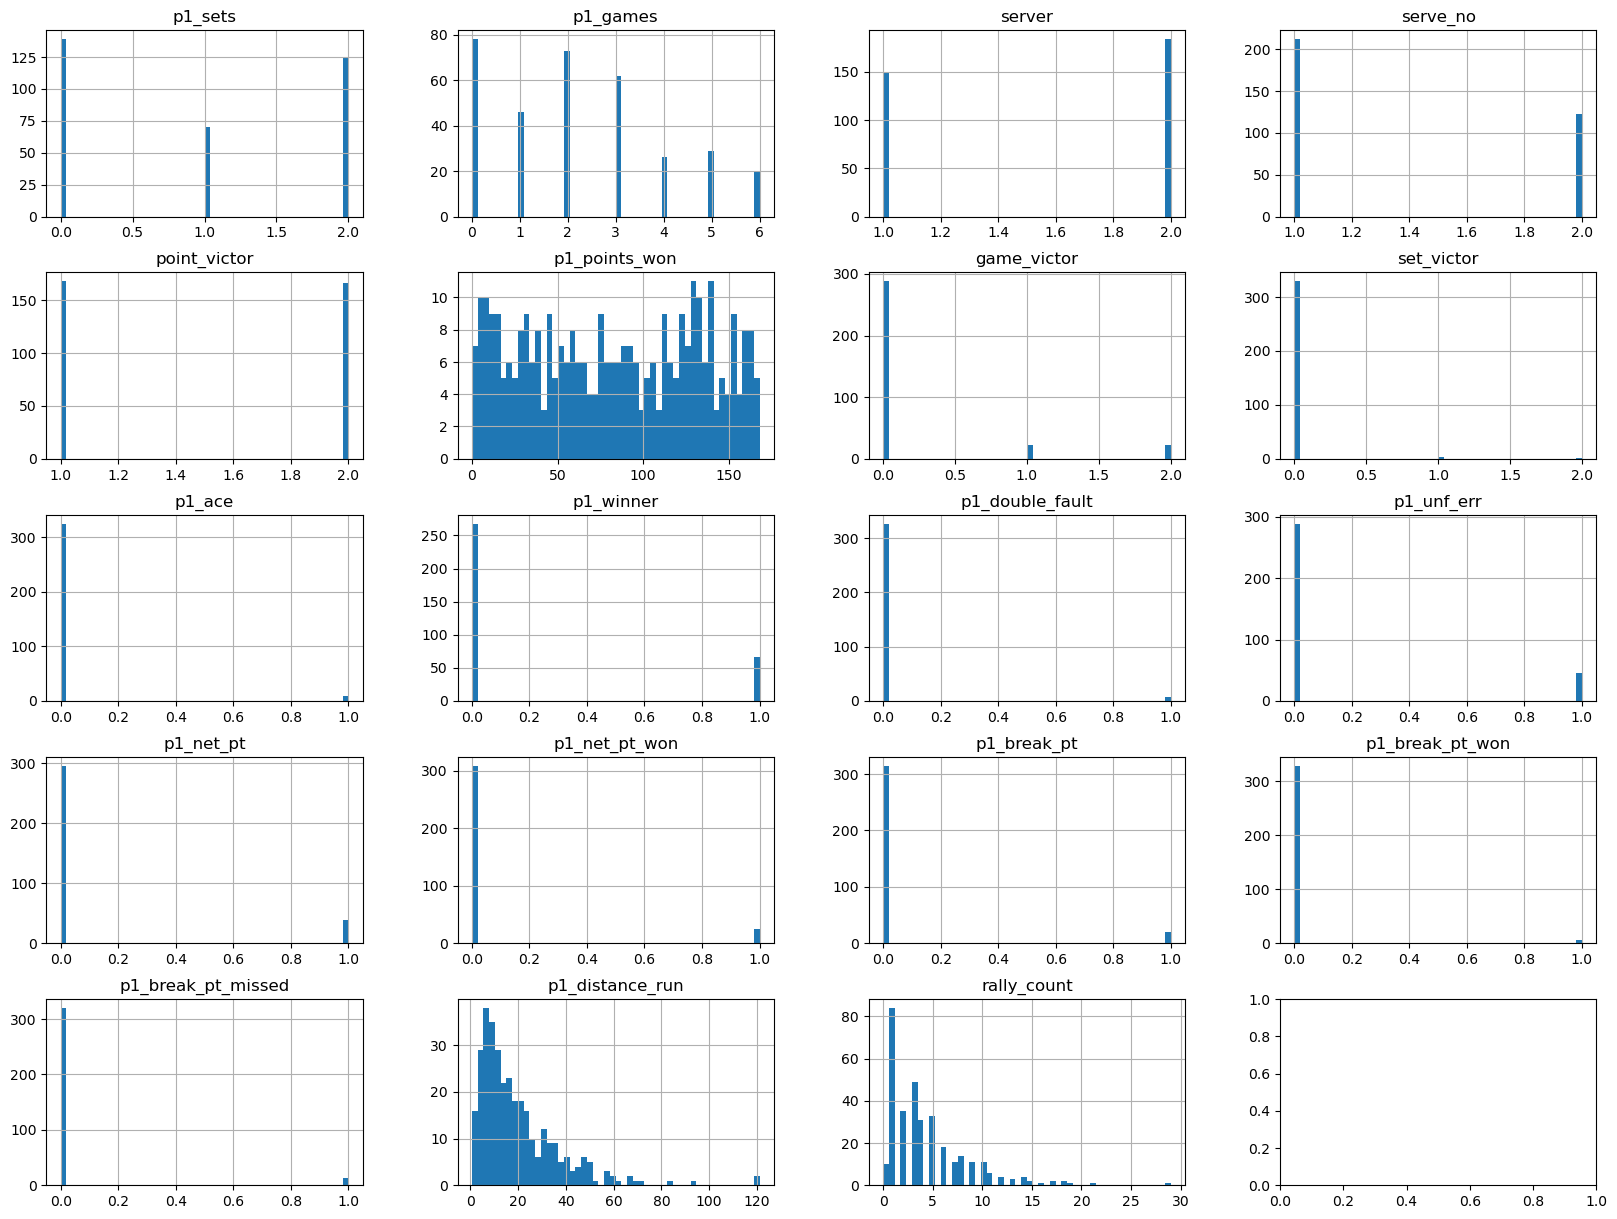

In [6]:
data.hist(bins=50,figsize=(20,15))# 绘制所有变量的柱状图-查看数据
plt.cla() # 清除轴的内容

C:\Users\蒋\AppData\Local\Temp\ipykernel_19096\1947198507.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr() # 皮尔逊相关系数


<Axes: >

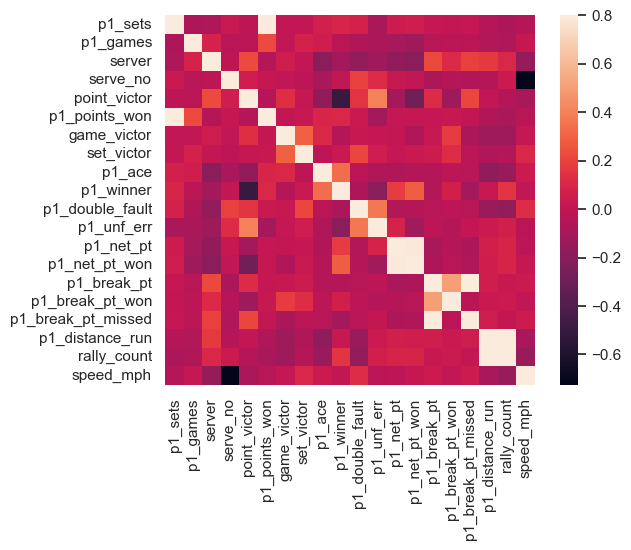

In [7]:
sns.set_theme(style='whitegrid')  # 图形主题

correlation = data.corr() # 皮尔逊相关系数
f, ax = plt.subplots()
sns.heatmap(correlation, square=True, vmax=0.8)

In [8]:
print(correlation)

                     p1_sets  p1_games    server  serve_no  point_victor  \
p1_sets             1.000000 -0.072325 -0.062950  0.028804     -0.013768   
p1_games           -0.072325  1.000000  0.085040 -0.030535     -0.024117   
server             -0.062950  0.085040  1.000000 -0.015121      0.223331   
serve_no            0.028804 -0.030535 -0.015121  1.000000      0.054288   
point_victor       -0.013768 -0.024117  0.223331  0.054288      1.000000   
p1_points_won       0.940574  0.227866 -0.044291  0.016651     -0.049751   
game_victor        -0.000662 -0.000968  0.043708 -0.002305      0.127639   
set_victor          0.005488  0.076848  0.004799 -0.019209      0.017306   
p1_ace              0.070316  0.060195 -0.184307 -0.087838     -0.165417   
p1_winner           0.091157 -0.027562 -0.111247 -0.001683     -0.493292   
p1_double_fault     0.077514 -0.065548 -0.162046  0.192869      0.147189   
p1_unf_err         -0.080117 -0.080926 -0.119711  0.119519      0.396970   
p1_net_pt   

                     p1_sets  p1_games    server  serve_no  point_victor  \
p1_sets             1.000000 -0.023287 -0.059998  0.029136     -0.015114   
p1_games           -0.023287  1.000000  0.090555 -0.010529     -0.022237   
server             -0.059998  0.090555  1.000000 -0.015121      0.223331   
serve_no            0.029136 -0.010529 -0.015121  1.000000      0.054288   
point_victor       -0.015114 -0.022237  0.223331  0.054288      1.000000   
p1_points_won       0.930762  0.281611 -0.045076  0.017220     -0.051333   
game_victor         0.006027  0.004271 -0.008970 -0.026237      0.029833   
set_victor          0.005764  0.107796  0.012021 -0.041852     -0.023031   
p1_ace              0.068920  0.067103 -0.184307 -0.087838     -0.165417   
p1_winner           0.089986 -0.031889 -0.111247 -0.001683     -0.493292   
p1_double_fault     0.076278 -0.060089 -0.162046  0.192869      0.147189   
p1_unf_err         -0.080223 -0.087839 -0.119711  0.119519      0.396970   
p1_net_pt   

C:\Users\蒋\AppData\Local\Temp\ipykernel_19096\4007525991.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_correlation_matrix = data.corr(method='spearman')# 斯皮尔曼相关系数


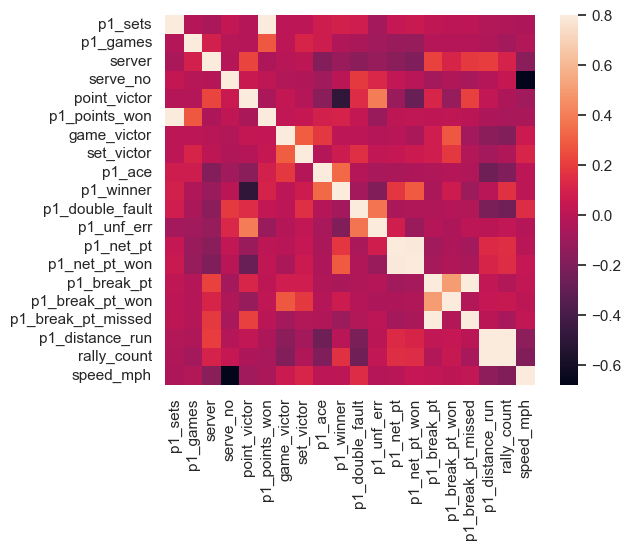

In [9]:
spearman_correlation_matrix = data.corr(method='spearman')# 斯皮尔曼相关系数
f, ax = plt.subplots()
sns.heatmap(spearman_correlation_matrix, square=True, vmax=0.8)
print(spearman_correlation_matrix)

<Axes: xlabel='elapsed_time'>

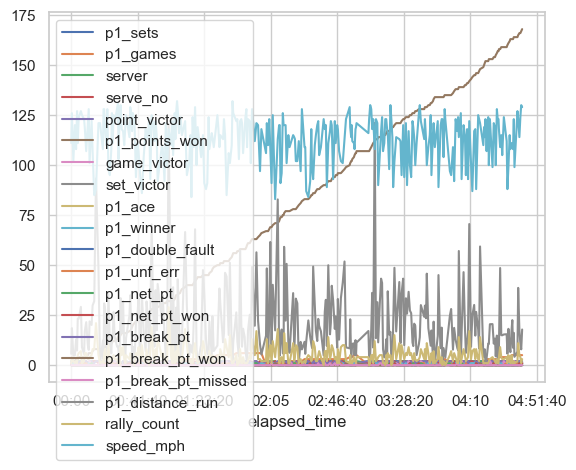

In [10]:
data.plot() #全部

<Axes: xlabel='elapsed_time'>

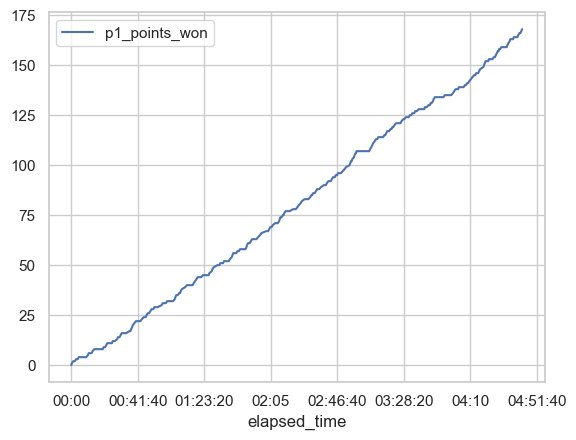

In [11]:
data.plot(y='p1_points_won', kind='line') # 总得分